In [1]:
from functions import *
import os

df = load_dataset("/Users/connormcdonald/Desktop/Masters/MIT807/Data/twitter_training.csv", ['target', 't_id', 'created_at', 'query', 'user', 'text'])
df['target'].value_counts()

4    800000
0    799999
Name: target, dtype: int64

In [2]:
df['text'] = df['text'].apply(lambda x: preprocess(x))

In [3]:
y = df['target']
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size = 0.20, random_state = 0)

In [5]:
tfidf = TfidfVectorizer(max_features = 600)
X_train_tf = tfidf.fit_transform(X_train).toarray() 
X_test_tf = tfidf.transform(X_test).toarray()

In [6]:
X_train_tf.shape, X_test_tf.shape, y_train.shape, y_test.shape

((1279999, 600), (320000, 600), (1279999,), (320000,))

In [2]:
# dataset = remove_unwanted_cols(dataset, ['t_id', 'created_at', 'query', 'user'])
# dataset.text = dataset['text'].apply(preprocess_tweet_text)
# print('dataset processed')
# os.system('say "dataset processed"')

dataset processed


0

In [3]:
# # Same tf vector will be used for Testing sentiments on unseen trending data
# tf_vector = get_feature_vector(np.array(dataset.iloc[:, 1]).ravel())
# X = tf_vector.transform(np.array(dataset.iloc[:, 1]).ravel())
# y = np.array(dataset.iloc[:, 0]).ravel()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# print('train test split complete')
# os.system('say "train test split complete"')

train test split complete


0

In [9]:
NB_model1 = BernoulliNB(alpha = 2)
NB_model2 = MultinomialNB()
LR_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
SVM_model = LinearSVC()
XGB_model = xgb.XGBClassifier()
LGBM_model = LGBMClassifier()

In [10]:
NB_model1.fit(X_train_tf, y_train)

BernoulliNB(alpha=2)

In [11]:
NB_model2.fit(X_train_tf, y_train)

MultinomialNB()

In [12]:
SVM_model.fit(X_train_tf, y_train)

LinearSVC()

In [13]:
LR_model.fit(X_train_tf, y_train)

KeyboardInterrupt: 

In [ ]:
LGBM_model.fit(X_train_tf, y_train)

LGBMClassifier()

In [ ]:
XGB_model.fit(X_train_tf, y_train)

/Users/connormcdonald/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:15:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_predict_nb1 = NB_model1.predict(X_test)
print(f'{accuracy_score(y_test, y_predict_nb1)}\n')

0.769778125



In [ ]:
y_predict_nb2 = NB_model2.predict(X_test)
print(f'{accuracy_score(y_test, y_predict_nb2)}\n')

0.760603125



In [ ]:
y_predict_svm = SVM_model.predict(X_test)
print(f'{accuracy_score(y_test, y_predict_svm)}\n')

0.7726125



In [ ]:
y_predict_lr = LR_model.predict(X_test)
print(f'{accuracy_score(y_test, y_predict_lr)}\n')

0.77916875



In [ ]:
y_predict_lgbm = LGBM_model.predict(X_test)
print(f'{accuracy_score(y_test, y_predict_lgbm)}\n')

0.745296875



In [ ]:
y_predict_xgb = XGB_model.predict(X_test)
print(f'{accuracy_score(y_test, y_predict_xgb)}\n')

0.745409375



<Figure size 640x480 with 0 Axes>

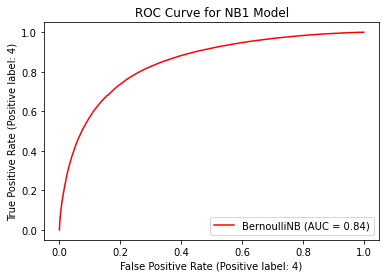

<Figure size 640x480 with 0 Axes>

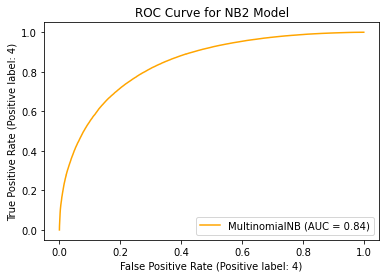

<Figure size 640x480 with 0 Axes>

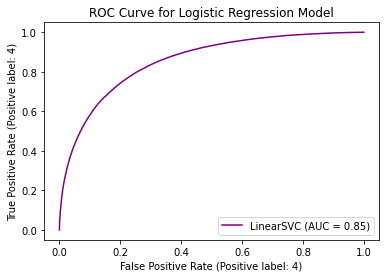

<Figure size 640x480 with 0 Axes>

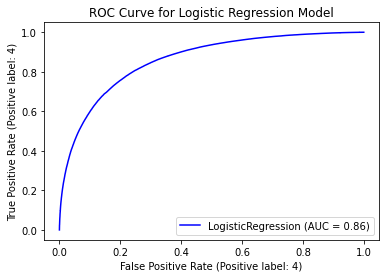

<Figure size 640x480 with 0 Axes>

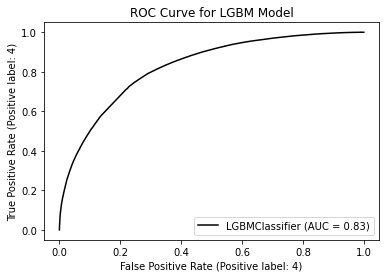

<Figure size 640x480 with 0 Axes>

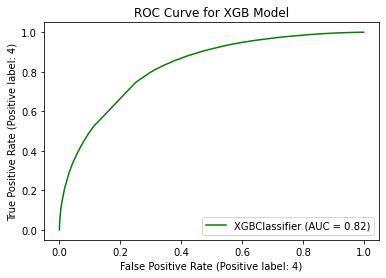

In [ ]:
from sklearn import metrics
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
metrics.plot_roc_curve(NB_model1, X_test, y_test, color = 'red')
plt.title('ROC Curve for NB1 Model')
plt.show() 

figure(figsize=(8, 6), dpi=80)
metrics.plot_roc_curve(NB_model2, X_test, y_test, color = 'orange')
plt.title('ROC Curve for NB2 Model')
plt.show() 

figure(figsize=(8, 6), dpi=80)
metrics.plot_roc_curve(SVM_model, X_test, y_test, color = 'purple')
plt.title('ROC Curve for Logistic Regression Model')
plt.show() 

figure(figsize=(8, 6), dpi=80)
metrics.plot_roc_curve(LR_model, X_test, y_test, color = 'blue')
plt.title('ROC Curve for Logistic Regression Model')
plt.show() 

figure(figsize=(8, 6), dpi=80)
metrics.plot_roc_curve(LGBM_model, X_test, y_test, color = 'black')
plt.title('ROC Curve for LGBM Model')
plt.show() 

figure(figsize=(8, 6), dpi=80)
metrics.plot_roc_curve(XGB_model, X_test, y_test, color = 'green')
plt.title('ROC Curve for XGB Model')
plt.show() 

In [18]:
# figure(figsize=(8, 6), dpi=80)
# metrics.plot_roc_curve(LR_model, X_test, y_test, color = 'red')
# plt.title('ROC Curve for Logistic Regression Model')
# plt.show() 

In [ ]:
import os
os.system('say "Your program has finished"')

0